In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacy import displacy, tokenizer
from transformers import pipeline

# Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AbhishekBiswas-github/Python_Data_Science/refs/heads/main/NLP%20Projects/Twitter%20Sentiment%20Analysis/twitter_dataset.csv')

In [3]:
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [4]:
data.info()
print('\n')
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB




Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64

# Exploratory Data Analysis

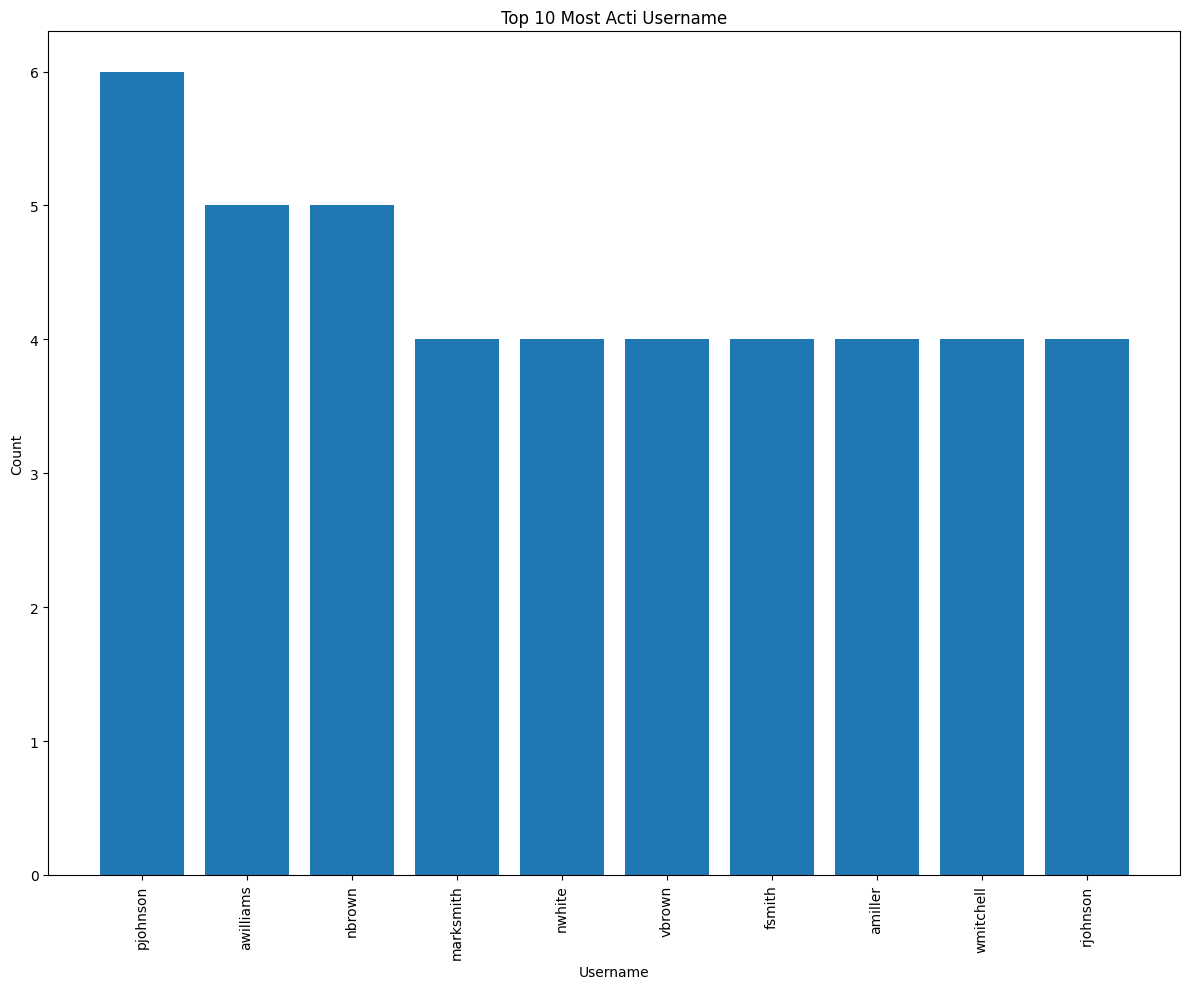

In [5]:
username_counts = data['Username'].value_counts().head(10)

plt.figure(figsize = (12, 10))
plt.bar(username_counts.index, username_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Username")
plt.ylabel("Count")
plt.title("Top 10 Most Acti Username")
plt.tight_layout()
plt.show()

In [19]:
sentiment_analysis = pipeline('sentiment-analysis', model='cardiffnlp/twitter-xlm-roberta-base-sentiment')

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

C:\Users\boss2\OneDrive\Desktop\AI Engineer Course\LLM Section\llms_course_env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\boss2\.cache\huggingface\hub\models--cardiffnlp--twitter-xlm-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but th

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


In [20]:
sentiment_analysis(data['Text'][0])[0]['label']

'neutral'

In [21]:
data['Label'] = data['Text'].apply(lambda text: sentiment_analysis(text)[0]['label'])

In [22]:
data.head(15)

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Label
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,neutral
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,neutral
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,positive
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,negative
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,neutral
5,6,ramirezmikayla,Cell without report weight. Could father chang...,22,75,2023-03-30 09:56:07,neutral
6,7,fieldsbrian,Receive difference their. Responsibility build...,12,43,2023-01-02 03:15:54,negative
7,8,jgood,Five sort guy why politics than. Somebody pret...,0,12,2023-01-22 20:08:31,neutral
8,9,turneredgar,Reveal table state view manager she. Fly yeah ...,15,26,2023-03-24 15:17:03,negative
9,10,audreymooney,List allow family rather continue. Agency mess...,97,28,2023-02-01 20:32:07,neutral


In [23]:
data['Label'].value_counts()

Label
neutral     4928
negative    3803
positive    1269
Name: count, dtype: int64

<Axes: xlabel='Label'>

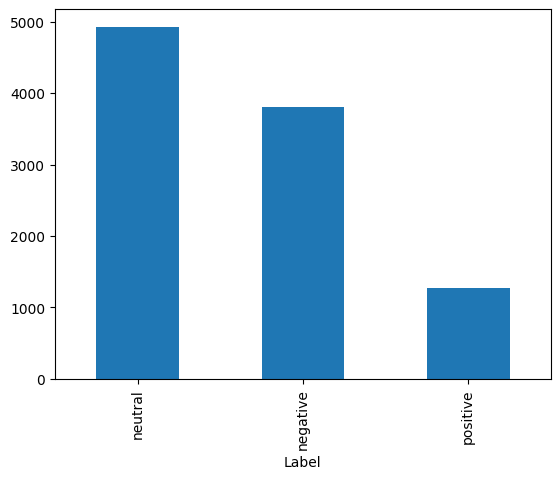

In [24]:
data['Label'].value_counts().plot.bar()

In [35]:
tweets_distribution = {
    'Positive' : [],
    'Negative' : [],
    'Neutral' : []
}

In [42]:
tweets_distribution['Negative']

['Laugh explain situation career occur serious. Five particular important size.\nCatch continue east teach dark discussion spring. Then candidate finally deep child. Big field billion force the there get.',
 'Receive difference their. Responsibility build let Democrat no better similar. Not bag when wall central position cell.\nSection site hour book notice spring body everyone. Person performance gun security least mean such.\nChoose seven start. Debate day save rock unit.',
 'Reveal table state view manager she. Fly yeah daughter begin everything pattern.\nPicture tell religious box bill production interest company. Low then throw. Thousand already sing attorney reality either.',
 'You hold central. Seem miss look very. None him us.\nCentury method government. Bill parent design how drop wall during. Growth speech minute see similar. Pressure maybe fight yeah these skin would.',
 'Population way sport late strategy. Pay positive suffer second hair.\nTree price itself fire know buildi

In [39]:
for text in data[data['Label'] == 'positive']['Text']:
    tweets_distribution['Positive'].append(text)
for text in data[data['Label'] == 'negative']['Text']:
    tweets_distribution['Negative'].append(text)
for text in data[data['Label'] == 'neutral']['Text']:
    tweets_distribution['Neutral'].append(text)